# Setup

In [1]:
import warnings

import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np

# import sys
# sys.dont_write_bytecode = True
# %load_ext autoreload
# %autoreload 2

from helper_functions import *
from keys import *

df = pd.read_csv("data/survey/finalsurvey.csv",
                 encoding="utf-16",
                 skiprows=range(1, 2), # file has two header rows, need to skip both
                 header=0)
keyToLabel = pd.read_csv("data/ListeDerVariablen.csv", encoding="utf-16")

# if you want to switch from errors to correct answers
df["AR_Listen_Perf"] = 12 - df["AR_Listen_Perf"] 
df["NonAR_Listen_Perf"] = 12 - df["NonAR_Listen_Perf"] 


# Survey

## Demographics

In [5]:
for k, n in zip(Demographic.Keys, Demographic.Names):
    df[n] = df[k]

# with pd.option_context('display.max_colwidth', 1000):
filtered = df[[
    "Alter",
    "ArErfahrung",
    # "Arbeitsumgebung",
    "Bildschirmzeit im Beruf/Studium",
    "Bildschirmzeit in der Freizeit",
    "Cybersickness",
    "NaturZurEntspannung",
    "NutzungRelaxApps",
    # "Geschlecht",
    # "WennJaWelcheApps",
    # "UserID",
]]
filtered = filtered[(filtered > 0).all(1)]

filtered.describe().applymap('{:.2f}'.format).loc[["mean", "std", "min", "max"]].T
# filtered.describe()


,mean,std,min,max
Alter,23.10,3.98,16.00,27.00
ArErfahrung,2.20,0.92,1.00,3.00
Bildschirmzeit im Beruf/Studium,7.20,2.04,3.00,9.00
Bildschirmzeit in der Freizeit,4.70,1.16,3.00,7.00
Cybersickness,1.20,0.42,1.00,2.00
NaturZurEntspannung,2.60,0.52,2.00,3.00
NutzungRelaxApps,1.10,0.32,1.00,2.00


## Short Stress State

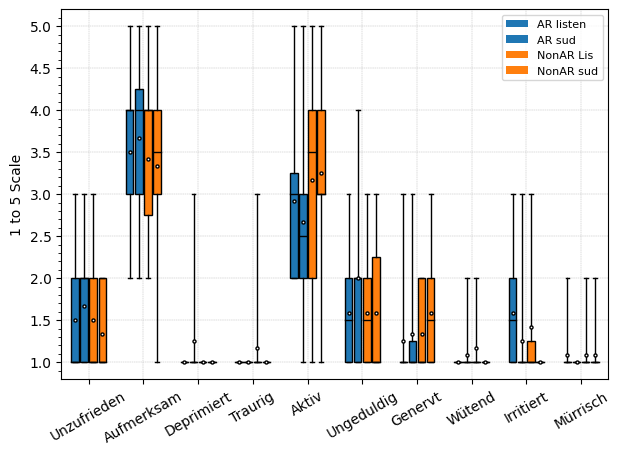

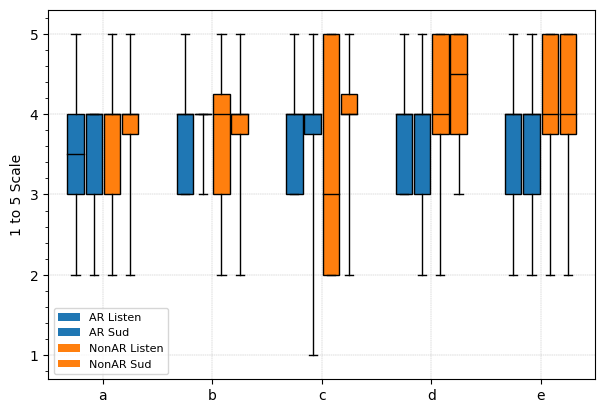

a) Ich war entschlossen meine Leistungsziele zu erreichen
b) Ich wollte bei der Aufgabe erfolgreich sein
c) Ich war motiviert die Aufgabe umzusetzen
d) Ich führte die Aufgabe kompetent aus
e) Grundsätzlich fühlte ich, dass ich die Dinge unter Kontrolle hatte


In [111]:
# groupedBoxPlots([df[SSSQ.Scale.AR.Listen_Keys], df[SSSQ.Scale.NonAR.Listen_Keys]], 
#                 ["AR Listen ", "NonAR Listen"])

groupedBoxPlots(
    [df[SSSQ.Scale.AR.Listen_Keys], 
     df[SSSQ.Scale.NonAR.Listen_Keys],
     df[SSSQ.Scale.AR.Sudoku_Keys], 
     df[SSSQ.Scale.NonAR.Sudoku_Keys]],
     ["AR listen", "AR sud", "NonAR Lis", "NonAR sud"],
     labels=SSSQ.Scale.Names,
     title="Comparing SSSQ scale of AR and NonAR",
     width=0.55,
     colours= COL_2Groups(2),
     meanMarkerSize=2.2,
     save=True,
     xlabel="",
     rot=30,
)


labels = [*"abcde"]
groupedBoxPlots(
    [df[SSSQ.StatementAgreement.AR.Listen_Keys], 
     df[SSSQ.StatementAgreement.NonAR.Listen_Keys],
     df[SSSQ.StatementAgreement.AR.Sudoku_Keys], 
     df[SSSQ.StatementAgreement.NonAR.Sudoku_Keys]],
    groups=["AR Listen", "AR Sud", "NonAR Listen", "NonAR Sud"],
    title="SSSQ Agreement with statements",
    labels=labels, rot=0,
    min=0.7, max=5.3,
    colours= COL_2Groups(2),
    # meanMarkerSize=3,
    xlabel="",
    save=True,
)
for label, frage, in zip(labels, SSSQ.StatementAgreement.Names):
    print(f"{label}) {frage}")

# makeBoxPlot(df[SSSQ.Scale.AR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach AR listen")
# makeBoxPlot(df[SSSQ.Scale.NonAR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach Non-AR listen")
# makeBoxPlot(df["DD01_01"], ["Alter"], "Demographie Übersicht")


## Short User Experience Questionnaire

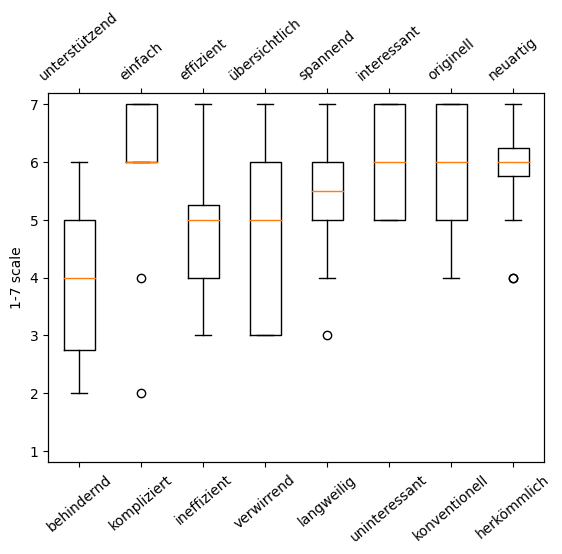

In [2]:
save=True
# save=False
dualAxisUeqBoxplot(df[ShortUserExpQ.Keys], "UeqCombined", save)
# dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="ArFirst")][ShortUserExpQ.Keys], "AR first runs", save)
# dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="NonArFirst")][ShortUserExpQ.Keys], "Non-AR first runs", save)


In [5]:


# groupedBoxPlots(
#     datasets=[
#         df.loc[(df["QUESTNNR"]=="ArFirst")][ShortUserExpQ.Keys],
#         df.loc[(df["QUESTNNR"]=="NonArFirst")][ShortUserExpQ.Keys]
#     ],
#     groups= ["AR first", "NonAR first"],
#     labels=ShortUserExpQ.Names_left,
#     doubleX=True,
#     )

## Emotionsskala

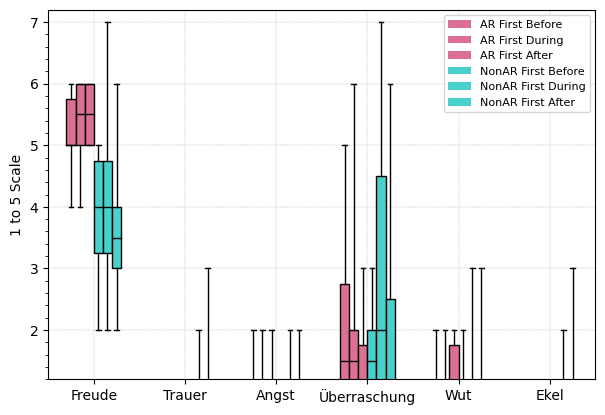

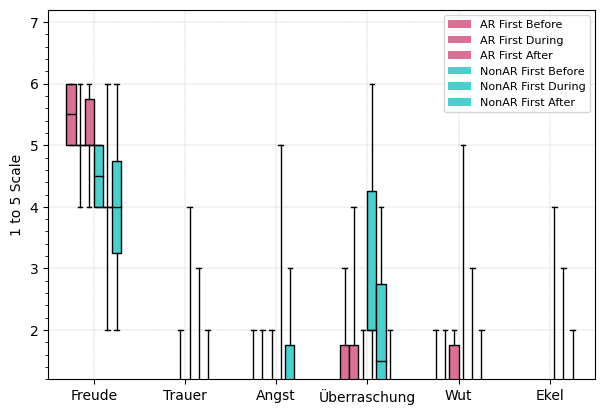

In [29]:
emoGroups = [
        "AR First Before",
        "AR First During",
        "AR First After",
        "NonAR First Before",
        "NonAR First During",
        "NonAR First After",
]
emoLabels = EmotionScales.Names
emoColors = alt_COL_2Groups(3)

groupedBoxPlots(
    [
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Vorher],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Zwischen],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Nachher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Vorher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Zwischen],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Nachher],
    ],
    emoGroups,
    labels=emoLabels,
    title="Emotions with AR",
    colours=emoColors,
    rot=0,
    xlabel="",
    save=True,
    min=1.2,
    max=7.2,
)
groupedBoxPlots(
    [
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Vorher],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Zwischen],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Nachher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Vorher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Zwischen],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Nachher],
    ],
    groups=emoGroups,
    labels=emoLabels,
    title="Emotions without AR",
    colours=emoColors,
    rot=0,
    xlabel="",
    save=True,
    min=1.2,
    max=7.2,
)

## Abschließende Fragen

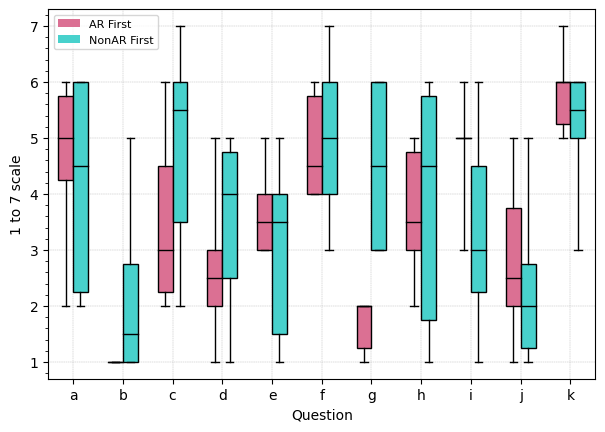

a) Ich war grundsätzlich aufgeregt, eine Augmented Reality Projektion zu erleben.
b) Ich empfand Übelkeit durch die virtuelle Projektionstechnik (Cyber Sickness)
c) Der eingeschränkte Sichtbereich der Projektion störte die Immersion
d) Das Tragen des Geräts war unangenehm
e) Ich hatte das Gefühl mich in der virtuellen Umgebung zu befinden
f) Ich habe die virtuelle Umgebung auch während dem Erledigen der Aufgaben beachtet
g) Die virtuelle Umgebung hat meine Konzentration gestört
h) Durch die virtuelle Umgebung habe ich mich naturnäher gefühlt
i) Durch die virtuelle Umgebung fühlte ich mich entspannter
j) Ich könnte mir vorstellen diese Anwendung zum Arbeiten zu nutzen
k) Ich könnte mir vorstellen eine solche Anwendung in Zukunft zu nutzen, wenn bestimmte Aspekte verbessert werden


In [21]:
labels = [*"abcdefghijk"]
absKey = AbschließendeFragen.Keys

# # to show only the last two
# specKey = AbschließendeFragen.Keys[-2:]
# absKey = specKey
# labels = labels[-2:]


groupedBoxPlots(
    [df.loc[(df["QUESTNNR"]=="ArFirst")][absKey],
     df.loc[(df["QUESTNNR"]=="NonArFirst")][absKey]],
    ["AR First", "NonAR First"],
    title="Abschließende Fragen",
    # labels=AbschließendeFragen.Names,
    labels=labels,
    rot=0,
    # save=True,
    gapInGroup=0.3,
    offsetFromLef=0.85,
    save=True,
    ylabel="1 to 7 scale",
    colours=alt_COL_2Groups(1)
)
for label, frage, in zip(labels, AbschließendeFragen.Names):
    print(f"{label}) {frage}")

# Task Performance

<Figure size 640x480 with 0 Axes>

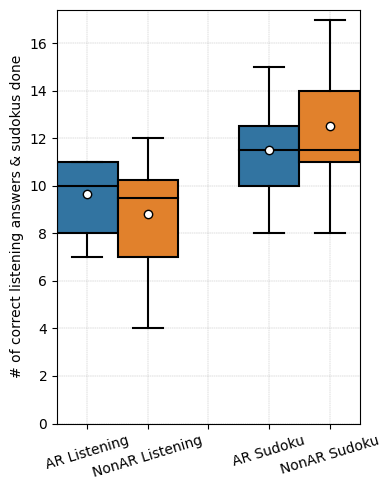

In [63]:
plt.clf()
f = plt.figure(figsize=[4,5])
ax = f.add_subplot(111)
df["empty"] = np.nan
sns.set_palette(sns.color_palette(['tab:blue', 'tab:orange', 'black', 'tab:blue', 'tab:orange']))
chart = sns.boxplot(
    data=df[[
        "AR_Listen_Perf",
        "NonAR_Listen_Perf",
        "empty",
        "AR_Sudoku_Perf",
        "NonAR_Sudoku_Perf",
    ]],
    showmeans=True,
    meanprops={'marker': 'o',
               'markerfacecolor': 'white',
               'markeredgecolor': 'black',
               'markersize': '6'},
    width=1,
)
chart.set_xticks(ticks=chart.get_xticks(),
                 labels=["AR Listening",
                         "NonAR Listening",
                         "",
                         "AR Sudoku",
                         "NonAR Sudoku"],
                # horizontalalignment='right',
                rotation=17,
)
ax.set_ylabel(ylabel='# of correct listening answers & sudokus done')
ax.set_ylim(0, 17.4)
f.tight_layout()
chart.set_axisbelow(True)
chart.grid(linestyle="--", linewidth=0.3)

chart.figure.savefig(figureSavePath+"taskPerf", dpi=300)
plt.show()

sns.reset_defaults() # otherwise the graphs after this get the same colors as this


# Headtracking

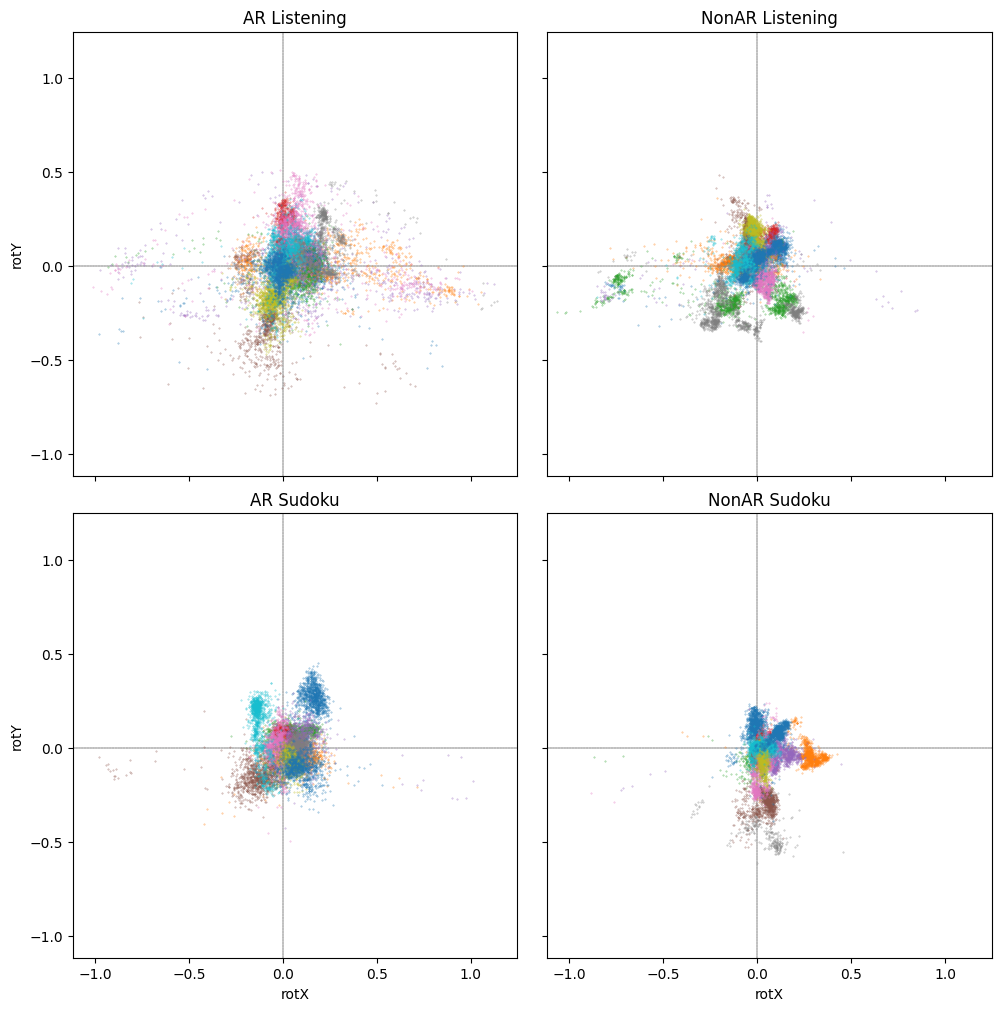

In [21]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

headtracking_files = glob.glob("data/headtracking/*.csv")
headtracking_dfs = (pd.read_csv(file) for file in headtracking_files)


cropped = False

size = (10, 10)
if cropped:
    size = (10, 6)

fig, axs = plt.subplots(2, 2, layout="constrained", figsize=size)
for ax in axs.flat:
    ax.set(aspect='equal')
    if cropped:
        ax.set_xticks(np.arange(-1, 2, 0.5))
        ax.set_yticks(np.arange(-1, 1, 0.5))

for i in headtracking_dfs:
    alpha = 0.6
    size = 0.5
    marker = "."
    x_axis = "rotX"
    y_axis = "rotY"
    calibrationWindow = 5

    # Get the selected headtracking rows for each task permutation
    arlisten = i.loc[   (i["ARorNonAR"]=="AR")    & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    nonarlisten = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    arsudoku = i.loc[   (i["ARorNonAR"]=="AR")    & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]
    nonarsudoku = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]

    datasets = [arlisten, nonarlisten, arsudoku, nonarsudoku]
    titles = ["AR Listening", "NonAR Listening", "AR Sudoku", "NonAR Sudoku"]

    for j, ax in enumerate(axs.flat):
        if cropped:
            ax.set_axisbelow(True)
            ax.grid(linestyle="--", linewidth=0.4)
        ax.axhline(y=0, color='grey', linestyle='--', zorder=0, linewidth=0.1)
        ax.axvline(x=0, color='grey', linestyle='--', zorder=0, linewidth=0.1)
        ax.set_title(titles[j])
        # Normalise to center of screen
        datasets[j] -= datasets[j].iloc[0:calibrationWindow].sum() / calibrationWindow
        ax.scatter(datasets[j][x_axis], -datasets[j][y_axis], alpha=alpha, s=size, marker=marker)

# Custom axis sizes
# Xlim = (-1.5, 1.5)
# Ylim = (-0.4, 0.75)
# plt.setp(axs, xlim=Xlim, ylim=Ylim)

refAxis = axs[0,0]
xlimits = refAxis.get_xlim()

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    if not cropped:
        ax.set_ylim(xlimits)
    ax.set(xlabel=x_axis, ylabel=y_axis)
    ax.label_outer()
    ax.sharex(refAxis)
    ax.sharey(refAxis)


title="Evalutation of headtracking data, n=" + str(len(headtracking_files))
# fig.suptitle(title)
# plt.tight_layout()
plt.savefig(figureSavePath+"headtracking", dpi=500)
plt.show()

# Hautleitfähigkeit

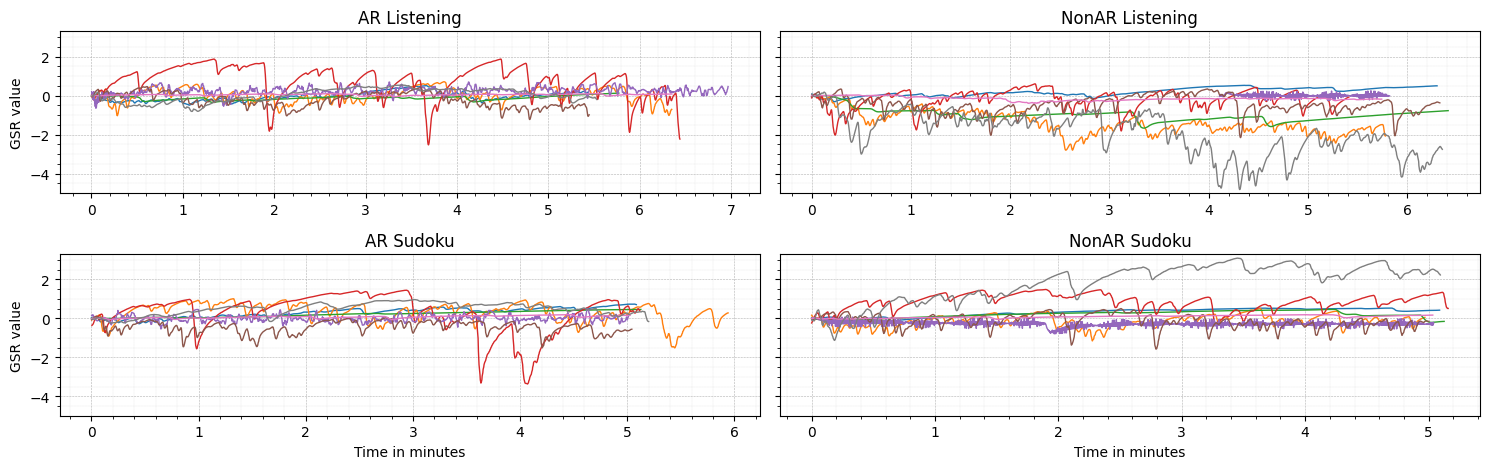

In [36]:
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd


path = "data/sweat/MA/*.json"
# path = "data/sweat/NoMA/*.json"
# path = "data/sweat/MA/broken/*.json.*"
linewidth = 1

sweat_files = glob.glob(path)
temp_list = []
for file in sweat_files:
    with open(file, encoding='utf-8') as f:
        sweat_df = pd.json_normalize(json.loads(f.read()))
        temp_list.append(sweat_df)
sweat_dfs = (file for file in temp_list) # change to generator


fig, axs = plt.subplots(2, 2, 
                        # sharex=True, sharey=True
                        )
fig.set_figwidth(15)

for i in sweat_dfs:
    calibrationWindow = 20
    x_axis = "Time"
    y_axis = "Value"
    arlisten = i.loc[   (i["ArState"]=="AR")    & (i["Task"]=="Listening")][[x_axis, y_axis]]
    nonarlisten = i.loc[(i["ArState"]=="NonAR") & (i["Task"]=="Listening")][[x_axis, y_axis]]
    arsudoku = i.loc[   (i["ArState"]=="AR")    & (i["Task"]=="Sudoku")][[x_axis, y_axis]]
    nonarsudoku = i.loc[(i["ArState"]=="NonAR") & (i["Task"]=="Sudoku")][[x_axis, y_axis]]

    datasets = [arlisten, nonarlisten, arsudoku, nonarsudoku]
    titles = ["AR Listening", "NonAR Listening", "AR Sudoku", "NonAR Sudoku"]

    # Normalise to center of screen
    for j, ax in enumerate(axs.flat):
        datasets[j][x_axis] = pd.to_timedelta(datasets[j][x_axis]).apply(lambda x: x.total_seconds()/60)
        startMean = datasets[j][y_axis].iloc[0:calibrationWindow].sum() / calibrationWindow
        ax.plot(datasets[j][x_axis], datasets[j][y_axis]-startMean, linewidth=linewidth)
        ax.set_title(titles[j])


# fig.supxlabel('Time in minutes')
# fig.supylabel('GSR value')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='Time in minutes', ylabel='GSR value')
    ax.label_outer()
    # use shared or custom below
    # ax.sharex(axs[0,0])
    # ax.sharey(axs[0,0])
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            # top=False,         # ticks along the top edge are off
            labelbottom=True  # labels along the bottom edge are off
            )
    ax.minorticks_on()
    ax.grid(which="major", linestyle="--", linewidth=0.4)
    ax.grid(which="minor", linestyle="--", linewidth=0.1)

# # Custom axis sizes
# # Xlim = (-1.5, 1.5)
Ylim = (-5, 3.3)
plt.setp(axs, 
        #  xlim=Xlim, 
         ylim=Ylim)

title="Evalutation der Hautleitfähigkeit"
# fig.suptitle(title)
plt.tight_layout()
plt.savefig(figureSavePath + "hautleitfähigkeit", dpi=800)
plt.show()


# Significance tests 

## Normality

In [3]:
ARFirsts = df.loc[(df.QUESTNNR=="ArFirst")]
NonARFirsts = df.loc[(df.QUESTNNR=="NonArFirst")]
results = pd.DataFrame(columns=["key"])

doWilcoxonWithUEQ = True

for key in All_Keys:
    if doWilcoxonWithUEQ:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter(action="ignore", category=UserWarning)
                res = pg.wilcoxon(ARFirsts[key], NonARFirsts[key])
        except:
            pass
    else:
        with warnings.catch_warnings():
            warnings.simplefilter(action="ignore", category=RuntimeWarning)
            res = pg.ttest(ARFirsts[key], NonARFirsts[key])

    with warnings.catch_warnings():
        warnings.simplefilter(action="ignore", category=UserWarning)
        res["normal"] = pg.normality(df[key], 
                                    #  method="normaltest"
                                     method="shapiro"
                                     )["normal"].bool()  

    res["key"] = key
    res["label"] = keyToLabel.loc[keyToLabel.VAR == key]["LABEL"].to_string(index=False)
    results = pd.concat([results , res])

print(f"{len(results)} total collumns")

nNormal = len(results.loc[results["normal"] == True])
print(f"{nNormal} collumns with normal distribution")

pThreshold = 0.05
nOverThreshold = len(results.loc[results["p-val"] < pThreshold])
if doWilcoxonWithUEQ:
    testtype = "wilcoxon"
else:
    testtype = "t-test"
print(f"{nOverThreshold} collumns with ArFirst/NonArFirst {testtype} p > {pThreshold}")

if doWilcoxonWithUEQ:
    print("Significance of in UEQ")
    UeqRes = results.loc[results["key"].isin(ShortUserExpQ.Keys)]
    display(UeqRes[["W-val", "p-val", "RBC"]])
    print(UeqRes["p-val"].describe())

# results
results.sort_values(by="p-val", ascending=True).head(nOverThreshold+1)

119 total collumns
43 collumns with normal distribution
1 collumns with ArFirst/NonArFirst wilcoxon p > 0.05
Significance of in UEQ


,W-val,p-val,RBC
Wilcoxon,7.5,1.000000,0.000000
Wilcoxon,2.0,0.169564,0.733333
Wilcoxon,4.0,0.850107,-0.200000
Wilcoxon,6.5,0.562500,0.380952
Wilcoxon,3.0,0.233038,-0.600000
Wilcoxon,4.0,0.850107,-0.200000
Wilcoxon,7.0,1.000000,0.066667
Wilcoxon,2.0,0.169564,0.733333


count    8.000000
mean     0.604360
std      0.368699
min      0.169564
25%      0.217170
50%      0.706303
75%      0.887580
max      1.000000
Name: p-val, dtype: float64


,key,W-val,alternative,p-val,RBC,CLES,normal,label
Wilcoxon,CF01_07,0.0,two-sided,0.031250,-1.0,0.000000,False,Abschließende Fragen: Die virtuelle Umgebung h...
Wilcoxon,SS01_02,0.0,two-sided,0.053337,1.0,0.930556,True,AR_Listen FeelingScale: Aufmerksam


## Wilcoxon

In [3]:
All_AR = df[AR_Keys]
ALL_NonAR = df[NonAR_Keys]
results = pd.DataFrame(columns=["ArKey", "NonArKey"]) # init with them so they get displayed first

errors = 0
for ar_key, nonar_key in zip(All_AR, ALL_NonAR):
    # print(All_AR[ar_key])
    with warnings.catch_warnings():
        warnings.simplefilter(action="ignore", category=UserWarning)
        try:
            res = pg.wilcoxon(All_AR[ar_key], ALL_NonAR[nonar_key])
        except ValueError as e:
            errors += 1
            # print("error with keys", ar_key, nonar_key)
            # print(e)
            pass
    # with warnings.catch_warnings():
    #     warnings.simplefilter(action="ignore", category=UserWarning)
    #     res["normal"] = pg.normality(df[key], 
    #                                 #  method="normaltest"
    #                                  method="shapiro"
    #                                  )["normal"].bool()  

    res["ArKey"] = ar_key
    res["NonArKey"] = nonar_key
    res["label"] = keyToLabel.loc[keyToLabel.VAR == ar_key]["LABEL"].to_string(index=False).replace("AR", "Ar/NonAr")
    results = pd.concat([results , res])

print("Wilcoxon test for all AR vs NonAR key-pairs:")
print(f"{len(results)} total collumns")
print(errors, "errors, due to x-y=0 for all elements")



pThreshold = 0.05
nOverThreshold = len(results.loc[results["p-val"] < pThreshold])
print(f"{nOverThreshold} collumns with p > {pThreshold}")
print(f'M={results["p-val"].mean():.3f}, SD={results["p-val"].std():.3f}')



print("\nKey-pairs with best p-vals:")
display(results.sort_values(by="p-val", ascending=True).head(3))


############################################################
# To get specific test results, insert your key pair here: #
############################################################
def getWicoxonForKey(input_keys=[""], show=True):
    if not type(input_keys) is list:
        input_keys = [input_keys]
    # if input_keys in All_Keys:
    sr = results.loc[(results["ArKey"].isin(input_keys)) | (results["NonArKey"].isin(input_keys))]
    print("="*30, f"\nResults for {input_keys}:")
    if show:
        with pd.option_context('display.max_colwidth', None):
            display(sr)
        if len(input_keys) == 1:
            print(f'(W={sr["W-val"].to_string(index=False)}, p={float(sr["p-val"].to_string(index=False)):.2f} , r={float(sr["RBC"].to_string(index=False)):.2f})')
    return sr

def getShortDescriptive(results):
    display(results.describe().applymap('{:.2f}'.format).loc[["mean", "std", "min", "max"]])

# getWicoxonForKey("AR_Listen_Perf")
# getWicoxonForKey(["SS09_03", "AR_Listen_Perf"])

# getWicoxonForKey(All_SSSQ, False).describe().applymap('{:.2f}'.format).loc[["mean", "std", "min", "max"]]
# getWicoxonForKey(All_Emo, False).describe().applymap('{:.2f}'.format).loc[["mean", "std", "min", "max"]]
# getShortDescriptive(getWicoxonForKey(All_Emo, False))


# custom j vs k
# "CF01_10",
# "CF01_11",
pg.wilcoxon(df["CF01_10"], df["CF01_11"])


Wilcoxon test for all AR vs NonAR key-pairs:
50 total collumns
3 errors, due to x-y=0 for all elements
0 collumns with p > 0.05
M=0.671, SD=0.335

Key-pairs with best p-vals:


,ArKey,NonArKey,W-val,alternative,p-val,RBC,CLES,label
Wilcoxon,SS07_03,SS09_03,2.0,two-sided,0.086276,-0.809524,0.392361,Ar/NonAr_Sudoku StatementAgreement: Ich war mo...
Wilcoxon,EM01_01,EM04_01,0.0,two-sided,0.094671,-1.000000,0.385417,EmoScales Ar/NonAr Vorher: Freude
Wilcoxon,SS01_05,SS03_05,0.0,two-sided,0.148915,1.000000,0.569444,Ar/NonAr_Listen FeelingScale: Aktiv


c:\Users\Bruno\dev\mvg-project\Auswertung\.env\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.00355,-1.0,0.055556


## Descriptive

In [14]:
descriptive = df[All_Keys].describe().applymap('{:.2f}'.format)


############################################################
# To get specific test results, insert your key pair here: #
############################################################
input_keys = "UE01_08"
print(f"Results for {input_keys}:")
display(descriptive[input_keys])


# descriptive.head()


Results for UE01_08:


count    12.00
mean      5.83
std       1.03
min       4.00
25%       5.75
50%       6.00
75%       6.25
max       7.00
Name: UE01_08, dtype: object

### Write to files

In [46]:
with open("tables/raw.txt", "w") as f:
    f.write(descriptive[All_Keys].T[["mean", "std"]].T.to_csv())

All_SSSQ = [
    *SSSQ.Scale.AR.Listen_Keys,
    *SSSQ.Scale.AR.Sudoku_Keys,
    *SSSQ.StatementAgreement.AR.Listen_Keys,
    *SSSQ.StatementAgreement.AR.Sudoku_Keys,
    *SSSQ.Scale.NonAR.Listen_Keys,
    *SSSQ.Scale.NonAR.Sudoku_Keys,
    *SSSQ.StatementAgreement.NonAR.Listen_Keys,
    *SSSQ.StatementAgreement.NonAR.Sudoku_Keys,
]
All_Emo = [
    *EmotionScales.AR.Vorher,
    *EmotionScales.AR.Zwischen,
    *EmotionScales.AR.Nachher,
    *EmotionScales.NonAR.Vorher,
    *EmotionScales.NonAR.Zwischen,
    *EmotionScales.NonAR.Nachher,
]
All_rest = [
    *ShortUserExpQ.Keys,
    *AbschließendeFragen.Keys,
    *Tasks.Keys,
]


def writeLatex(data, title="table"):
    data = data.T[["mean", "std"]]

    data.to_latex(
        index=True,
        buf="tables/"+title+".tex",
        caption="All results",
        # columns=["mean", "std"],
        # longtable=True,
        # bold_rows=True,
        escape=True,
        column_format="r|cc",
        formatters={"name": str.upper},
        float_format="{:.2f}".format,
    )

writeLatex(descriptive)
writeLatex(descriptive[All_SSSQ], "SSSQ")
writeLatex(descriptive[All_Emo], "Emo")
writeLatex(descriptive[All_rest], "Rest")

# descriptive.head()

## graph-test

,W,pval,normal
SS01_02,0.866929,0.059753,True


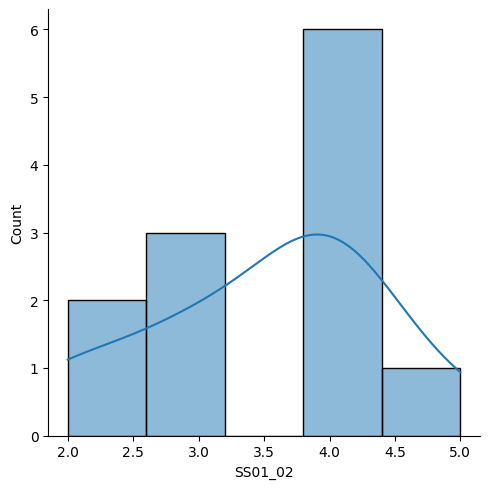

In [27]:
# print("Example table for ShortUserExpQ")
# print(results.loc[results["key"].isin(ShortUserExpQ.Keys)][["T", "p-val", "cohen-d"]])

# Normality and diff test

# key = "CF01_07"
key = "SS01_02"
sns.displot(df[key], kde=True)

pg.normality(df[key])


#idk why this does not work. its like in the slides
# diff = ARFirsts[key] - NonARFirsts[key]
# diff.plot(kind="hist")